In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [37]:
df = pd.read_csv("Data\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [38]:
df.rename(columns={"Genre":"Gender"}, inplace=True)

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df = df.set_index("CustomerID")                 # make CustomerID the index
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})  # convert gender to binary

In [41]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


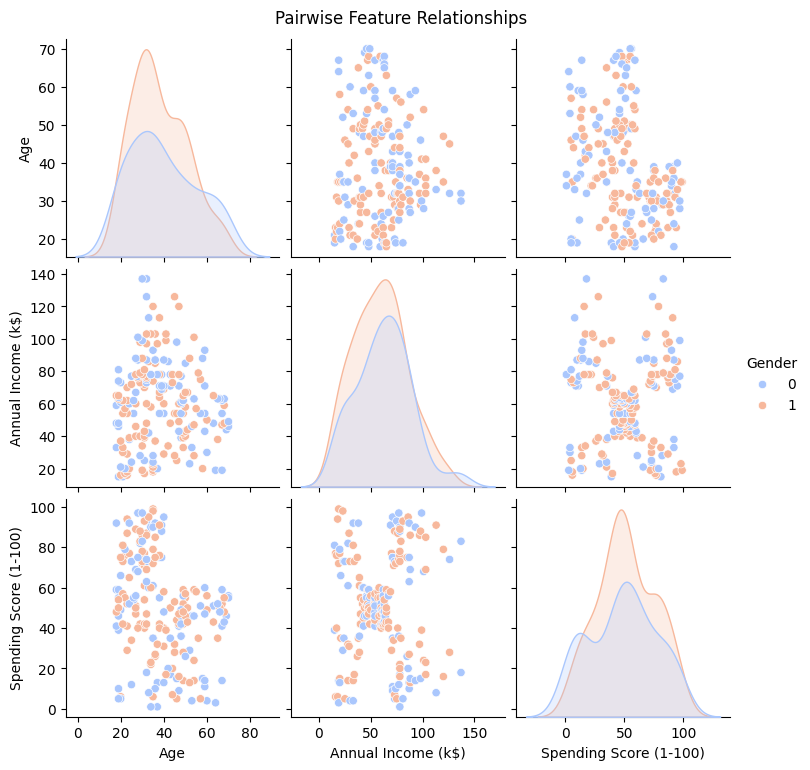

In [42]:
# Select the numeric columns (Gender is now binary, so include it)
sns.pairplot(df, hue="Gender", diag_kind="kde", palette="coolwarm")

plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


# K-means Clustering

In [43]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop("Gender",axis=1))
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [49]:
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(df_scaled)
df["Label_KNN"] = kmeans.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label_KNN
CustomerID,,,,,
1,0,19,15,39,4
2,0,21,15,81,0
3,1,20,16,6,4
4,1,23,16,77,0
5,1,31,17,40,4


In [45]:
ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)

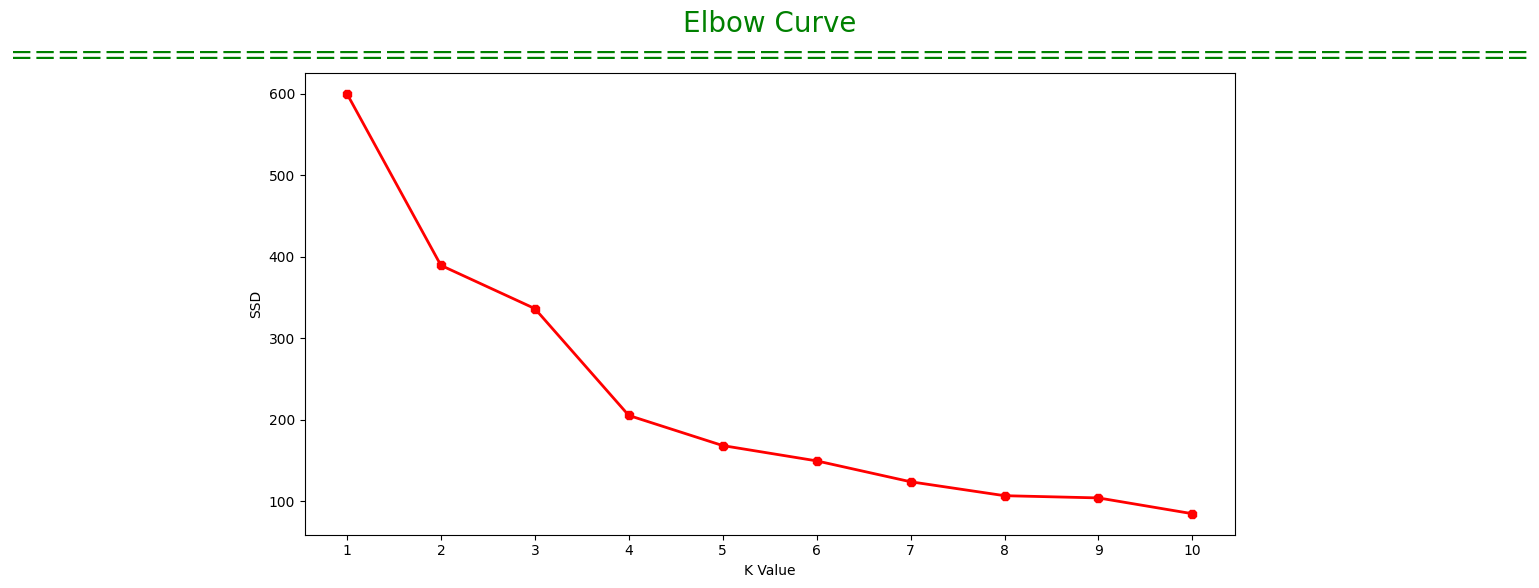

In [46]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")
plt.show()

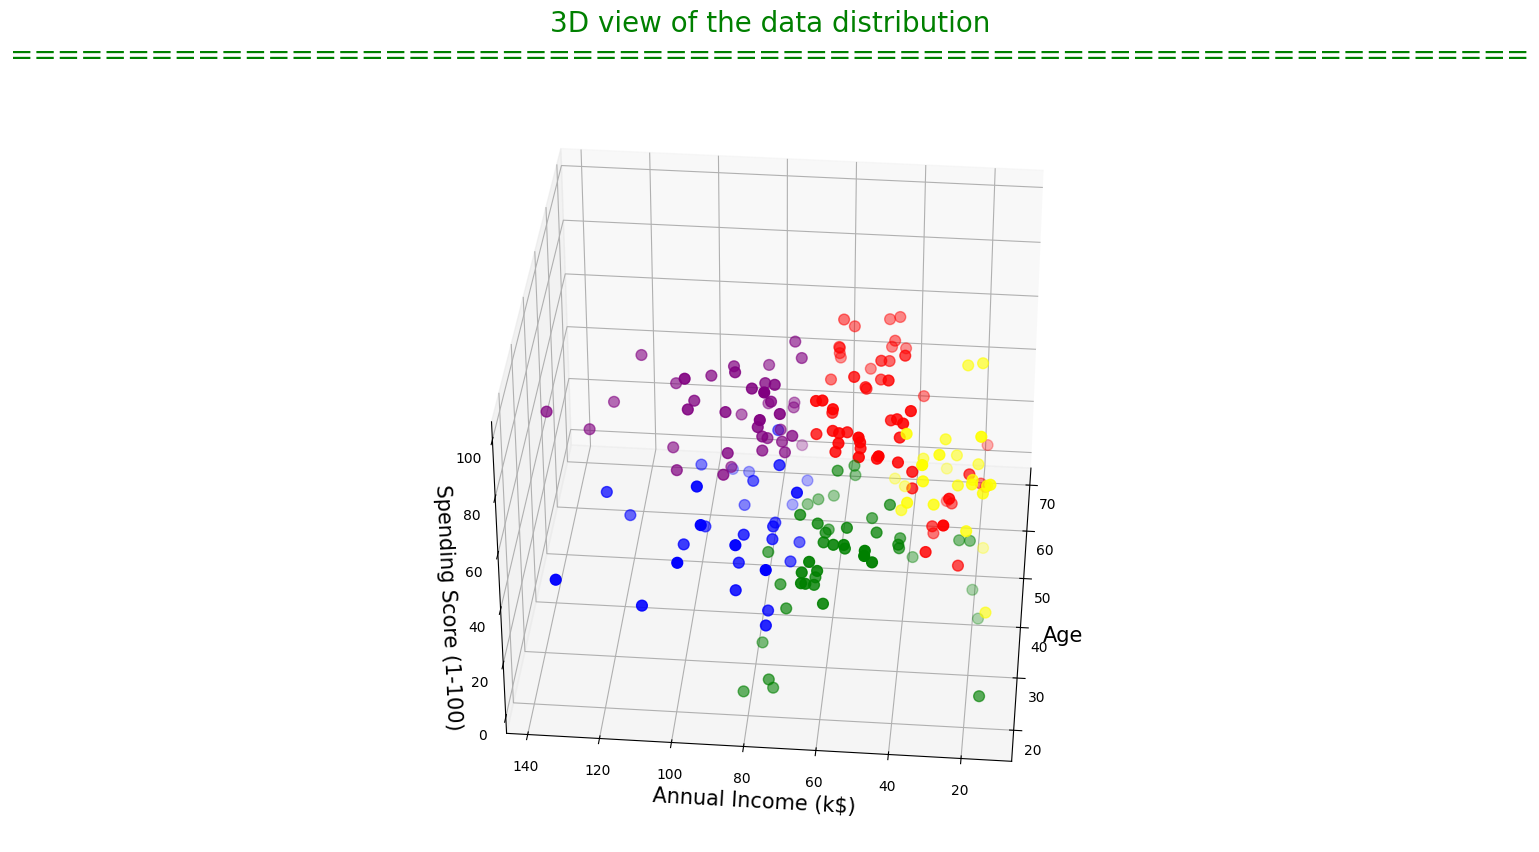

In [47]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Label_KNN == 0], df["Annual Income (k$)"][df.Label_KNN == 0], df["Spending Score (1-100)"][df.Label_KNN == 0], c='purple', s=60)
ax.scatter(df.Age[df.Label_KNN == 1], df["Annual Income (k$)"][df.Label_KNN == 1], df["Spending Score (1-100)"][df.Label_KNN == 1], c='red', s=60)
ax.scatter(df.Age[df.Label_KNN == 2], df["Annual Income (k$)"][df.Label_KNN == 2], df["Spending Score (1-100)"][df.Label_KNN == 2], c='blue', s=60)
ax.scatter(df.Age[df.Label_KNN == 3], df["Annual Income (k$)"][df.Label_KNN == 3], df["Spending Score (1-100)"][df.Label_KNN == 3], c='green', s=60)
ax.scatter(df.Age[df.Label_KNN == 4], df["Annual Income (k$)"][df.Label_KNN == 4], df["Spending Score (1-100)"][df.Label_KNN == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.title("3D view of the data distribution\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
ax.set_zlabel('Spending Score (1-100)', fontsize=15)
plt.show()


In [59]:
df.groupby('Label_KNN').agg(['mean','max','min'])#.sort_values(by=['Annual Income (k$)','Spending Score (1-100)'])

Gender                Age         Annual Income (k$)           \
               mean max min       mean max min               mean  max min   
Label_KNN                                                                    
0          0.590909   1   0  25.272727  35  18          25.727273   39  15   
1          0.437500   1   0  42.625000  59  19          89.437500  137  71   
2          0.568966   1   0  55.551724  70  42          48.482759   79  19   
3          0.538462   1   0  32.692308  40  27          86.538462  137  69   
4          0.632653   1   0  27.612245  40  18          50.959184   76  15   

          Spending Score (1-100)          
                            mean max min  
Label_KNN                                 
0                      79.363636  99  61  
1                      17.343750  39   1  
2                      41.775862  60   3  
3                      82.128205  97  63  
4                      43.122449  61   5

C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\3958759993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label_KNN', y=col, palette=palette)
C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\3958759993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label_KNN', y=col, palette=palette)
C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\3958759993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label_KNN', y=col, palette=palette)


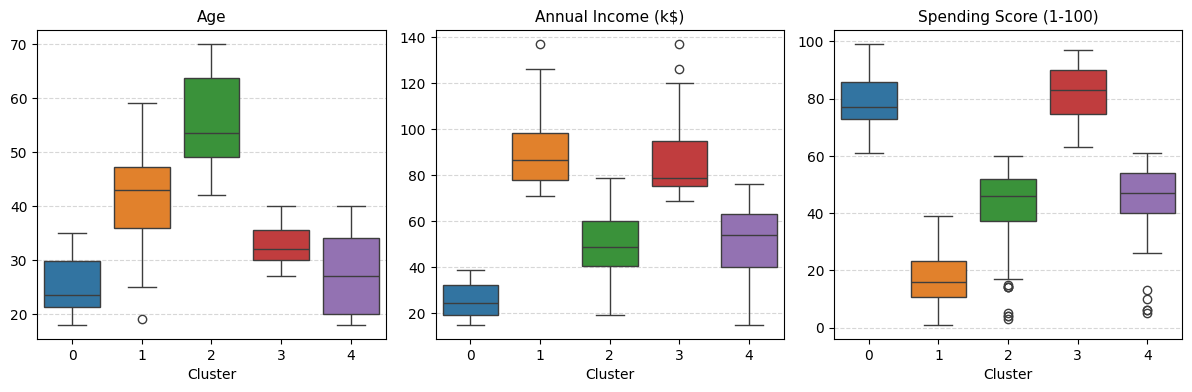

In [90]:
palette = {
    '0': "#1f77b4",
    '1': "#ff7f0e",
    '2': "#2ca02c",
    '3': "#d62728",
    '4': "#9467bd"
}


features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(12, 4))

for i, col in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(data=df, x='Label_KNN', y=col, palette=palette)
    plt.title(col, fontsize=11)
    plt.xlabel('Cluster')
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(pad=1.0)
plt.show()


In [57]:
df.groupby('Label_KNN').count()['Age'].sort_values(ascending=False)

Label_KNN
2    58
4    49
3    39
1    32
0    22
Name: Age, dtype: int64

In [98]:
label_names = {
    0: "Impulsive young spenders",
    1: "Wealthy but frugal",
    2: "Mature average spenders",
    3: "Wealthy premium buyers",
    4: "Balanced steady consumers"
}

# Map labels to a new column
df["Customer_Type"] = df["Label_KNN"].map(label_names)


In [126]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.410


In [127]:
for k in range(3, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"k={k}: silhouette={score:.3f}")


k=3: silhouette=0.358
k=4: silhouette=0.404
k=5: silhouette=0.408
k=6: silhouette=0.431
k=7: silhouette=0.410


## Outliers

In [105]:
distances = np.linalg.norm(df_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Define outliers — e.g., top 5% farthest points
threshold = np.percentile(distances, 95)
outliers = np.where(distances > threshold)[0]

print(f"Detected {len(outliers)} outliers.")
outlier_data = df.iloc[outliers].copy()
outlier_data["Distance_to_Centroid"] = distances[outliers]

display(outlier_data[['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)',
                       'Distance_to_Centroid','Customer_Type']].sort_values(by="Distance_to_Centroid", ascending=False).head(10))


Detected 10 outliers.


,Gender,Age,Annual Income (k$),Spending Score (1-100),Distance_to_Centroid,Customer_Type
CustomerID,,,,,,
3,1,20,16,6,2.038606,Balanced steady consumers
7,1,35,18,6,1.985112,Balanced steady consumers
9,0,64,19,3,1.974853,Mature average spenders
199,0,32,137,18,1.969235,Wealthy but frugal
200,0,30,137,83,1.936051,Wealthy premium buyers
23,1,46,25,5,1.819785,Mature average spenders
15,0,37,20,13,1.793825,Balanced steady consumers
163,0,19,81,5,1.791099,Wealthy but frugal
135,0,20,73,5,1.787884,Balanced steady consumers


| Cluster | Age Range | Income (k$) | Spending Score | Customer Type |
|----------|------------|--------------|----------------|----------------|
| 0 | Young | Low | High | Impulsive young spenders |
| 1 | Mid-aged | High | Low | Wealthy but frugal |
| 2 | Older | Medium | Medium | Mature average spenders |
| 3 | Young–mid | High | High | Wealthy premium buyers |
| 4 | Young–mid | Medium | Medium | Balanced, steady consumers |


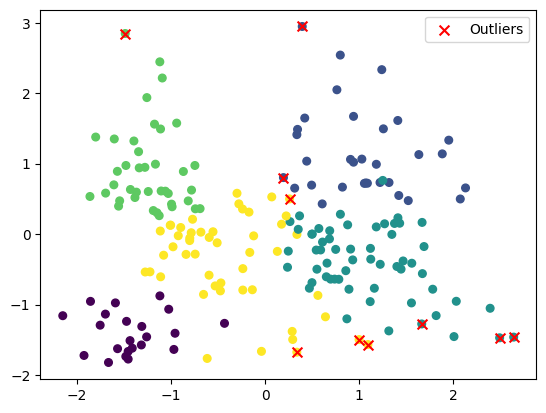

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis', s=30)
plt.scatter(X_pca[outliers,0], X_pca[outliers,1], c='red', s=50, marker='x', label='Outliers')
plt.legend()
plt.show()


## Conclusion
Based on the boxplots shown in the image, here’s a breakdown of the **five customer clusters** according to **Age**, **Annual Income (k$)**, and **Spending Score (1–100)**:  

---

### **Cluster 0 (Blue) – Young, Low Income, High Spending**
- **Age:** Young (≈20–30 years old)  
- **Income:** Low (≈$20–40k)  
- **Spending Score:** Very high (≈70–95)  
🟢 **Interpretation:** These are **young, enthusiastic spenders** with low income but strong purchasing behavior — likely students or young professionals who spend impulsively.

---

### **Cluster 1 (Orange) – Middle-Aged, High Income, Low Spending**
- **Age:** Mid-range (≈35–45 years old)  
- **Income:** High (≈$80–100k)  
- **Spending Score:** Very low (≈10–20)  
🔵 **Interpretation:** **Affluent but cautious customers**, possibly mature professionals or family-oriented individuals who prefer saving or investing over luxury spending.

---

### **Cluster 2 (Green) – Older, Moderate Income, Average Spending**
- **Age:** Older (≈50–65 years old)  
- **Income:** Moderate (≈$40–60k)  
- **Spending Score:** Medium (≈40-50)  
🟠 **Interpretation:** **Older middle-class customers** with stable income and average consumption habits — practical and less responsive to luxury promotions.

---

### **Cluster 3 (Red) – Young Adults, High Income, High Spending**
- **Age:** Young to middle-aged (≈30–35 years old)  
- **Income:** High (≈$80-95k)  
- **Spending Score:** Very high (≈80–90)  
🟣 **Interpretation:** **Premium, high-value customers** — financially capable and spend freely on lifestyle or luxury goods. Key target group for premium marketing.

---

### **Cluster 4 (Purple) – Young to Mid-Age, Moderate Income, Moderate Spending**
- **Age:** Mixed, mostly 20s–30s 
- **Income:** Moderate (≈$40–60k)  
- **Spending Score:** Moderate (≈40–55)  
🟡 **Interpretation:** **Average-income, balanced spenders**, likely working professionals or small families — stable but not extravagant consumers.

---

### **Summary Table**

| Cluster | Age Range | Income (k$) | Spending Score | Customer Type |
|----------|------------|--------------|----------------|----------------|
| 0 | Young | Low | High | Impulsive young spenders |
| 1 | Mid-aged | High | Low | Wealthy but frugal |
| 2 | Older | Medium | Medium | Mature average spenders |
| 3 | Young–mid | High | High | Wealthy premium buyers |
| 4 | Young–mid | Medium | Medium | Balanced, steady consumers |


# DBSCAN

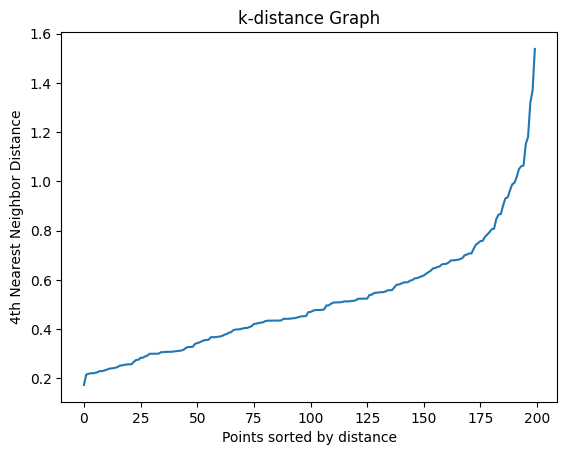

In [106]:
from sklearn.neighbors import NearestNeighbors

# k usually = min_samples - 1
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances[:, 4])  # 4 because n_neighbors=5
plt.plot(distances)
plt.title("k-distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()


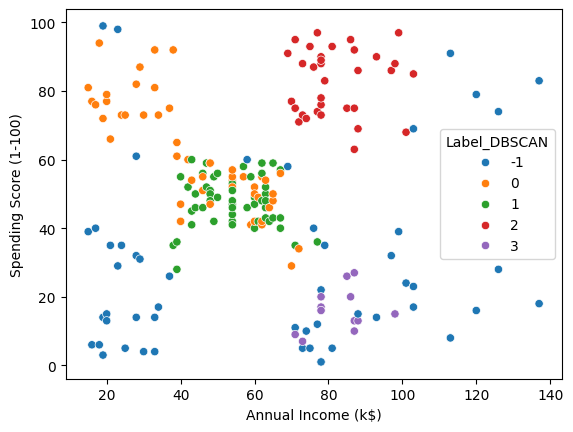

Label_DBSCAN
-1    52
 0    50
 1    52
 2    34
 3    12
Name: count, dtype: int64


Age                         Annual Income (k$)         \
                   mean median        std count               mean median   
Label_DBSCAN                                                                
-1            40.250000   37.0  12.385752    52          63.557692   72.0   
 0            24.380000   23.0   4.827176    50          44.020000   44.5   
 1            54.288462   50.5   9.396154    52          54.500000   54.0   
 2            32.588235   32.0   3.838542    34          81.647059   78.0   
 3            43.916667   44.0   4.962740    12          83.000000   85.5   

                              Spending Score (1-100)                          
                    std count                   mean median        std count  
Label_DBSCAN                                                                  
-1            39.114920    52              29.519231   20.0  26.732876    52  
 0            16.791020    50              60.540000   55.5  16.089304    50  
 1             9.375605    52              47.653846   48.0   7.199904    52  
 2             9.698117    34              82.558824   85.5   9.532055    34  
 3             7.567875    12              16.083333   15.5   6.316765    12

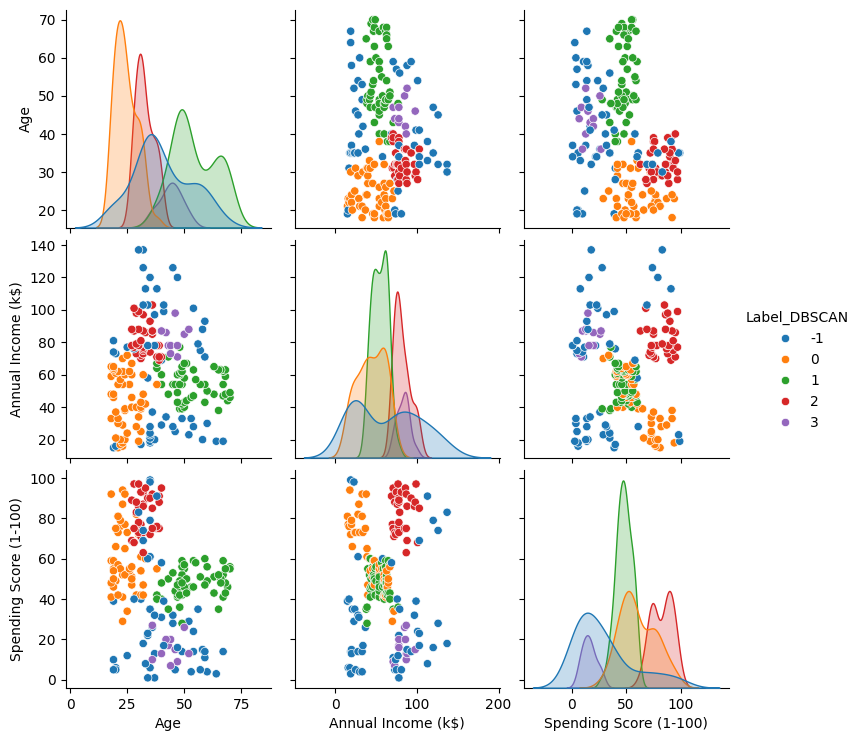

C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\3170986148.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label_DBSCAN', y=col, palette='tab10')
C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\3170986148.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label_DBSCAN', y=col, palette='tab10')
C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\3170986148.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label_DBSCAN', y=col, palette='tab10')


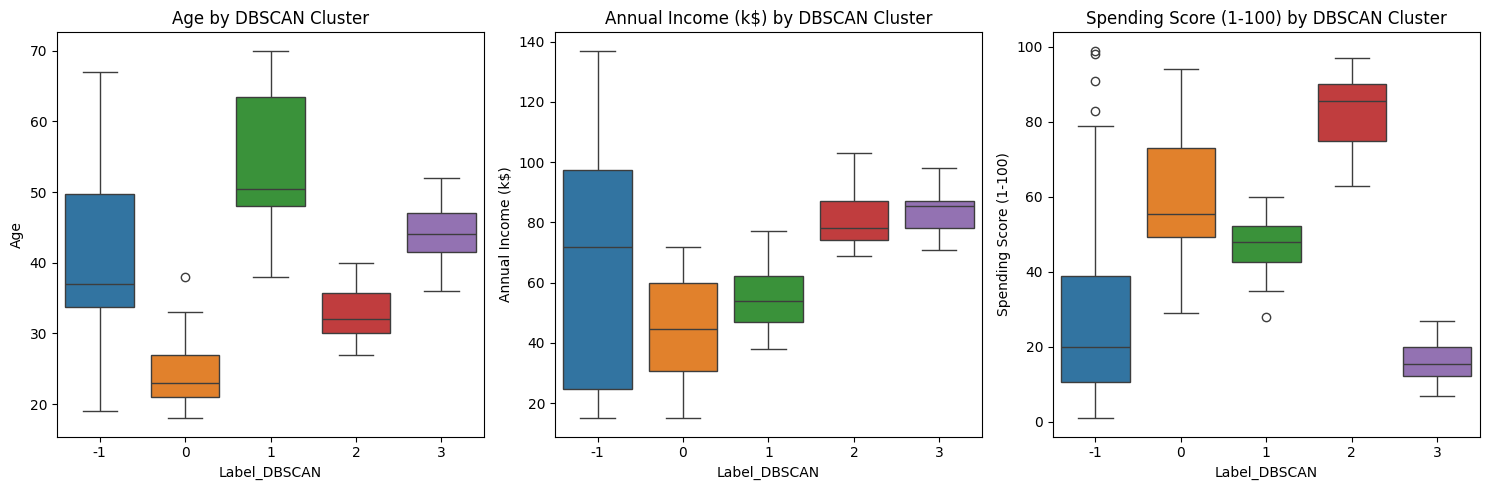

In [187]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6, min_samples=8).fit(df_scaled)
labels = db.fit_predict(df_scaled)

df['Label_DBSCAN'] = labels
df['Label_DBSCAN'].value_counts()
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Label_DBSCAN', palette='tab10')
plt.show()

features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

cluster_counts = df["Label_DBSCAN"].value_counts().sort_index()
print(cluster_counts)

summary = df.groupby("Label_DBSCAN")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].agg(['mean', 'median', 'std', 'count'])
display(summary)

sns.pairplot(df, vars=features, hue="Label_DBSCAN", palette="tab10", diag_kind="kde")
plt.show()


plt.figure(figsize=(15, 5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Label_DBSCAN', y=col, palette='tab10')
    plt.title(f"{col} by DBSCAN Cluster")
plt.tight_layout()
plt.show()


## DBSCAN Cluster Conclusion (vs K-Means Reference)

| Label | Description | Age | Income (k$) | Spending | K-Means Match | Note |
|--------|--------------|-----|--------------|-----------|----------------|------|
| **-1** | Noise / scattered samples | 20–65 | 15–135 | 0–80 | Mixed | ❌ too wide, not a real segment |
| **0** | Young, low income, **high spending** | 20-27 | 25-60 | 50-75 | Cluster 0 | ✅ impulsive buyers |
| **1** | Older, moderate income, **medium spending** | 45–65 | 45–60 | 40–50 | Cluster 2 | ✅ average spenders |
| **2** | Young–mid adults, high income, **high spending** | 28-35 | 75-90 | 75-90 | Cluster 4 | ⚠ partial overlap |
| **3** | Mid-aged, high income, **low spending** | 40–50 | 80-95 | 15-25 | Cluster 1 | ✅ wealthy but frugal |

---

  **Summary**
- DBSCAN recovers **4/5 K-Means segments** correctly.  
- Large portion (Label −1) treated as noise → weak density contrast.  
- Suitable for **complex nonlinear clusters**, not this structured dataset.  
- **K-Means remains the best** for this case: clearer, interpretable, full coverage.


# OPTICS

Label_OPTICS
-1    70
 0    51
 1    29
 2    16
 3    34
Name: count, dtype: int64


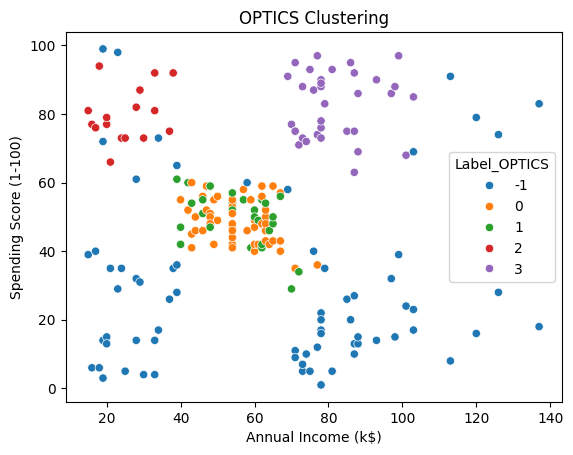

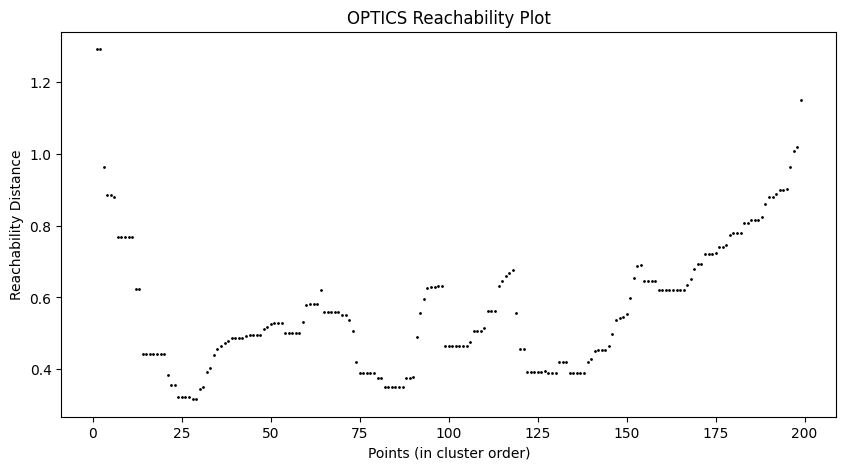

Age                         Annual Income (k$)         \
                   mean median        std count               mean median   
Label_OPTICS                                                                
-1            40.942857   40.0  11.700224    70          64.414286   73.5   
 0            53.549020   50.0  10.054479    51          55.529412   54.0   
 1            24.068966   23.0   4.765434    29          54.862069   57.0   
 2            22.937500   22.5   3.295831    16          25.250000   24.5   
 3            32.588235   32.0   3.838542    34          81.647059   78.0   

                              Spending Score (1-100)                          
                    std count                   mean median        std count  
Label_OPTICS                                                                  
-1            35.806441    70              29.100000   20.0  25.271941    70  
 0             8.610117    51              48.549020   48.0   6.335026    51  
 1            10.020422    29              49.724138   51.0   7.763912    29  
 2             7.532153    16              79.875000   78.0   7.923593    16  
 3             9.698117    34              82.558824   85.5   9.532055    34

In [166]:
from sklearn.cluster import OPTICS

optics = OPTICS(
    min_samples=9,
    xi=0.06,
    min_cluster_size=0.078,
    metric='euclidean'
)



labels_optics = optics.fit_predict(df_scaled)

df['Label_OPTICS'] = labels_optics

print(df['Label_OPTICS'].value_counts().sort_index())


sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Label_OPTICS', palette='tab10')
plt.title("OPTICS Clustering")
plt.show()

reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

plt.figure(figsize=(10,5))
plt.plot(range(len(reachability)), reachability, 'k.', markersize=2)
plt.title('OPTICS Reachability Plot')
plt.xlabel('Points (in cluster order)')
plt.ylabel('Reachability Distance')
plt.show()

summary_optics = df.groupby("Label_OPTICS")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].agg(['mean','median','std','count'])
display(summary_optics)


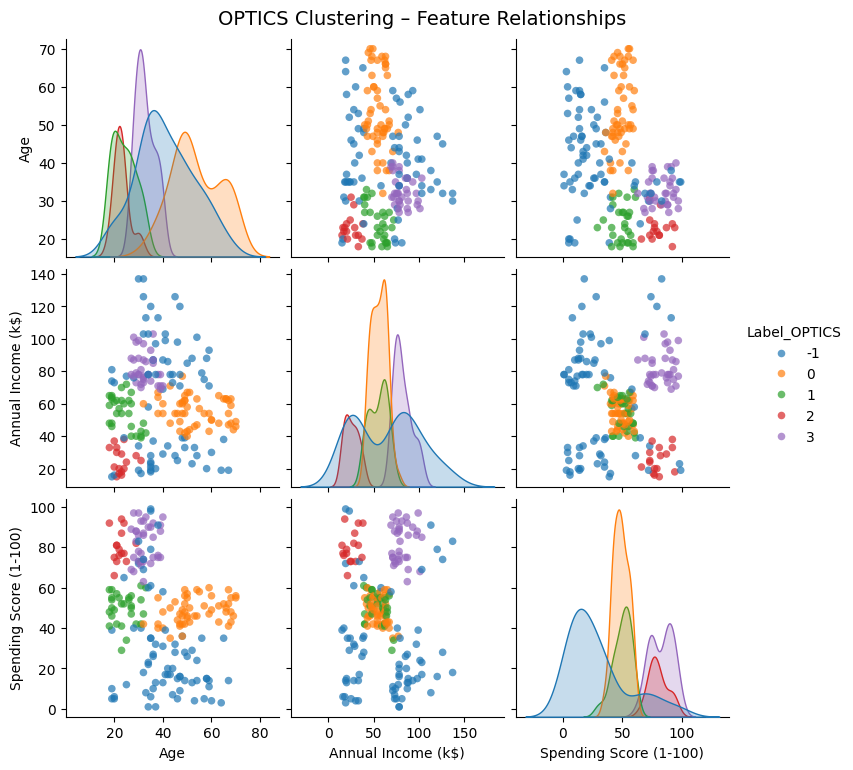

In [167]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Label_OPTICS"]

# Pairplot
sns.pairplot(
    df[features],
    hue="Label_OPTICS",
    palette="tab10",
    diag_kind="kde",     # smoother distribution
    corner=False,         # show full grid
    plot_kws={"s": 30, "alpha": 0.7, "edgecolor": "none"}
)

plt.suptitle("OPTICS Clustering – Feature Relationships", y=1.02, fontsize=14)
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\696575587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='Label_OPTICS', y='Age', palette='tab10')
C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\696575587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='Label_OPTICS', y='Annual Income (k$)', palette='tab10')
C:\Users\ACER\AppData\Local\Temp\ipykernel_14460\696575587.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df, x='Label_OPTICS', y='Spending Score (1-100)', p

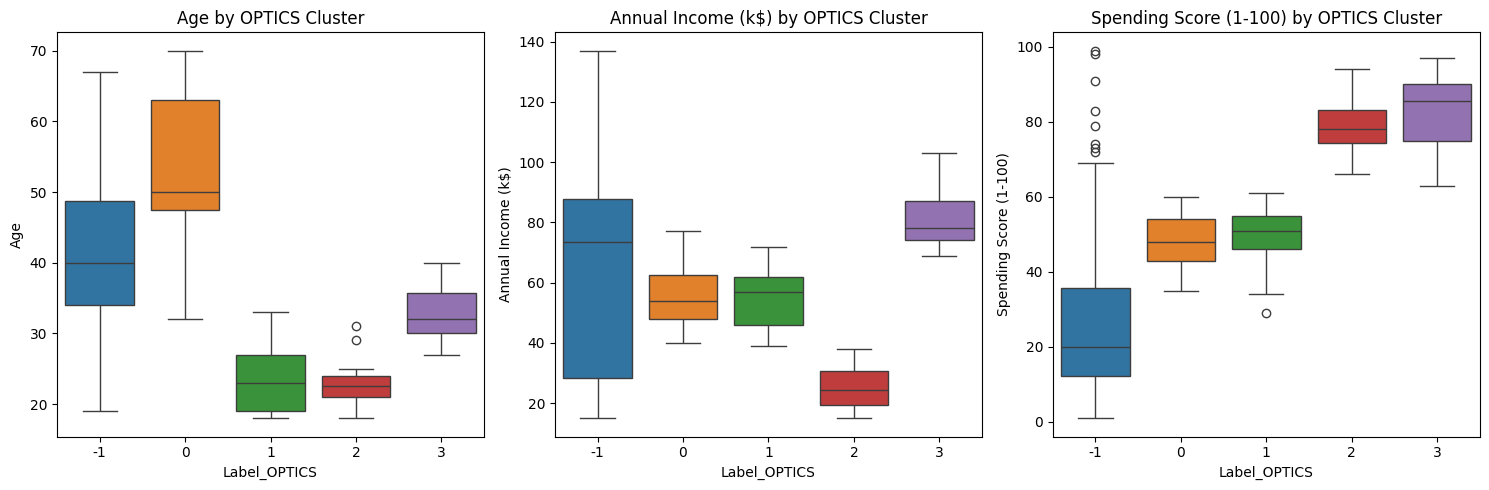

In [168]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes[0], data=df, x='Label_OPTICS', y='Age', palette='tab10')
axes[0].set_title('Age by OPTICS Cluster')
axes[0].set_xlabel('Label_OPTICS')
axes[0].set_ylabel('Age')

sns.boxplot(ax=axes[1], data=df, x='Label_OPTICS', y='Annual Income (k$)', palette='tab10')
axes[1].set_title('Annual Income (k$) by OPTICS Cluster')
axes[1].set_xlabel('Label_OPTICS')
axes[1].set_ylabel('Annual Income (k$)')

sns.boxplot(ax=axes[2], data=df, x='Label_OPTICS', y='Spending Score (1-100)', palette='tab10')
axes[2].set_title('Spending Score (1-100) by OPTICS Cluster')
axes[2].set_xlabel('Label_OPTICS')
axes[2].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()


## OPTICS Clustering Conclusion

| Label | Description | Age | Income (k$) | Spending | K-Means Match | Note |
|--------|--------------|-----|--------------|-----------|----------------|------|
| **-1** | Noise / mixed group, wide variation | 20–65 | 15–135 | 0–70 | Mixed | ❌ Too dispersed, mostly outliers like DBSCAN |
| **0** | Mid-aged, moderate income, **medium spending** | 45–65 | 50–70 | 40–55 | Cluster 2 | ✅ Mature average spenders |
| **1** | Young, moderate income, **medium spending** | 18–30 | 40–60 | 45–55 | Cluster 4 | ⚠ Similar to balanced spenders |
| **2** | Young, low income, **high spending** | 18–25 | 15–35 | 75–90 | Cluster 0 | ✅ Impulsive young buyers |
| **3** | Young–mid adults, high income, **high spending** | 25–35 | 70–100 | 80–95 | Cluster 3 | ✅ Premium, wealthy spenders |

---

**Summary**
- OPTICS produced **4 main clusters** + noise (`-1`), quite close to **K-Means 5-cluster structure**.  
- The core consumer patterns — **impulsive young spenders**, **wealthy frugal buyers**, and **premium high-spenders** — are consistent across models.  
- However, **OPTICS merges** some of K-Means’ smaller, cleaner groups (like balanced spenders) and still **flags too many noise points**, similar to DBSCAN.  
- In short: **K-Means still offers the most interpretable segmentation**, while OPTICS improves slightly over DBSCAN but remains less stable.


# Final Comparative Conclusion: K-Means vs DBSCAN vs OPTICS

After testing three clustering methods — **K-Means (KMC)**, **DBSCAN**, and **OPTICS** — on the same customer dataset (`Age`, `Annual Income`, `Spending Score`), the following conclusions summarize their performance, interpretability, and reliability.

---

##  1. K-Means (KMC)
| Metric | Observation |
|---------|--------------|
| **Cluster Count** | 5 well-defined clusters |
| **Distribution** | Balanced (22–58 samples per cluster) |
| **Silhouette Score** | 0.41 → Moderate but meaningful separation |
| **Interpretation** | Clear segmentation by spending–income patterns |
| **Strengths** | Stable, interpretable, clusters match real marketing personas |
| **Weaknesses** | Assumes spherical clusters; sensitive to scaling and outliers |

**➡ Result:**  
K-Means produced **five coherent, interpretable clusters** representing real-world consumer segments:
- Impulsive young spenders  
- Wealthy but frugal  
- Mature average spenders  
- Premium high-income buyers  
- Balanced mid-level consumers  

**Best balance of interpretability, stability, and cluster quality.**

---

## 2. DBSCAN
| Metric | Observation |
|---------|--------------|
| **Cluster Count** | 5 clusters + 62 noise points |
| **Distribution** | Imbalanced (many outliers, few dense cores) |
| **Interpretation** | Captures extreme spenders well, but merges/misses mid-groups |
| **Strengths** | Detects outliers and arbitrary shapes |
| **Weaknesses** | Highly sensitive to `eps`, poor balance between dense and sparse regions |

**➡ Result:**  
DBSCAN correctly identified **young impulsive spenders** and **wealthy but frugal** customers but labeled many valid points as noise.  
It struggled to separate middle-income moderate spenders due to uneven density.

**Good for anomaly detection, weak for market segmentation.**

---

## 3. OPTICS
| Metric | Observation |
|---------|--------------|
| **Cluster Count** | 4 main clusters + 70 noise points |
| **Distribution** | Slightly better than DBSCAN but still heavy noise |
| **Interpretation** | Similar to K-Means in key clusters but merged several groups |
| **Strengths** | More robust than DBSCAN; detects variable-density clusters |
| **Weaknesses** | Still noisy; parameters (xi, min_cluster_size) hard to tune |

**➡ Result:**  
OPTICS recovered patterns close to K-Means:  
- Young high-spending cluster (matches KMC cluster 0)  
- Mature medium spenders (matches KMC cluster 2)  
- Premium buyers (matches KMC cluster 3)  
But too many points fell into noise, making segmentation less stable.

**Slight improvement over DBSCAN, still inferior to K-Means for this dataset.**

---

## Overall Comparison

| Model | #Clusters (valid) | Noise % | Cluster Balance | Interpretability | Best Use Case |
|--------|-------------------|----------|------------------|------------------|----------------|
| **K-Means** | 5 | 0% | ✅ Good | ✅ Excellent | Customer segmentation |
| **DBSCAN** | 5 | ~25% | ❌ Poor | ⚠️ Moderate | Outlier detection |
| **OPTICS** | 4 | ~30% | ⚠️ Uneven | ⚠️ Moderate | Variable-density datasets |

---

## **Final Verdict**
For this customer dataset, **K-Means is clearly the most effective algorithm**.  
It produces **consistent, business-meaningful clusters** that align with income and spending behaviors, while **DBSCAN and OPTICS over-detect noise** due to uneven data density.

**Recommendation:**  
Use **K-Means** for marketing segmentation and profiling; reserve **DBSCAN/OPTICS** for specialized anomaly detection or density analysis where noise detection is important.
